 # ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

 # Objetivo del proyecto
El propósito de este proyecto es analizar el comportamiento de los clientes de Megaline con respecto a las dos tarifas de prepago disponibles: Surf y Ultimate, con el objetivo de determinar cuál de ellas genera mayores ingresos para la empresa.

El análisis incluirá la limpieza y preparación de los datos, el cálculo de los ingresos generados por cada cliente y la comparación estadística de los ingresos medios entre las dos tarifas. Finalmente, se presentarán conclusiones basadas en evidencia que ayuden a orientar futuras decisiones comerciales y de marketing de la empresa.

 # Paso 1. Descripción de los datos
 Leer los archivos de datos (`megaline_calls.csv`, `megaline_internet.csv`, `megaline_messages.csv`, `megaline_plans.csv` y `/megaline_users.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. <br> Verificar la información para cada DataFrame creado.

In [2]:
# Importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import factorial
import math
from scipy import stats as st
import seaborn as sns

In [3]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
messages = pd.read_csv("megaline_messages.csv")
plans = pd.read_csv("megaline_plans.csv")
users = pd.read_csv("megaline_users.csv")

In [ ]:
# Definir el color usado para cada plan en los gráficos en la sección de visualización
colores = {"surf": '#1f77b4', "ultimate": '#ff7f0e'}
orden_planes= ['surf', 'ultimate']

In [4]:
# Revisar unas cuantas lineas de los datos para corroborar que se hayan cargado correctamente al leer los datos
print(
f"""
{calls.head(3)}
----------------
{internet.head(3)}
----------------
{messages.head(3)}
----------------
{plans.head(3)}
----------------
{users.head(3)}
"""
)


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
----------------
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
----------------
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
----------------
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
----------------
   user_id first_name  last

 # Paso 2. Preprocesamiento de los datos

In [5]:
# Revisar la información general deL DataFrame de planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div style="border-left: 10px solid #616161; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">
    
- Tipos de datos correctos
- No hay datos ausentes que rellenar
- Oportunidad de enriquecer los datos agregando columna que especifique la cantidad incluida en MB

In [7]:
# Agrega una nueva columna al DataFrame de planes que convierta los megabytes incluidos en gigabytes
plans["gbs_included"] = plans["mb_per_month_included"] / 1024
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gbs_included  
0          15.0  
1          30.0  


In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


<div style="border-left: 10px solid #616161; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">
    
- reg_date y churn_date deberian estar en formato de fecha
- Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberian ser suceptibles a cambios matematicos
- Se puede agregar el estado del plan es decir si sigue activo en lugar NaN

In [ ]:
# Convierte las columnas de fechas del dataframe users y el user_id al tipo de dato adecuado
users["reg_date"] = pd.to_datetime(users["reg_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"])
users["user_id"] = users["user_id"].astype("object")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


In [11]:
# Llena los valores nulos en la columna churn_date con el valor "activo"
users["churn_date"] = users["churn_date"].fillna("activo")

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22



<div style="border-left: 10px solid #616161; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

- call_date debería ser fecha
- Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberían ser susceptibles a cambios matemáticos
- Se podría agregar una columna donde se extraiga el mes para contabilizar la llamadas agrupadas por mes en futuros análisis

In [ ]:
# Convierte las columnas de fechas del dataframe calls y el user_id al tipo de dato adecuado
calls["call_date"] = pd.to_datetime(calls["call_date"])
calls["user_id"] = calls["user_id"].astype("object")
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Agrega una nueva columna al DataFrame de llamadas que contenga el mes en que se realizó la llamada
calls["call_month"] = calls["call_date"].dt.month
print(calls.sample(10))

              id user_id  call_date  duration  call_month
132191  1476_122    1476 2018-06-29      9.81           6
128191  1460_241    1460 2018-11-01      0.00          11
68993   1247_326    1247 2018-09-20      8.82           9
2161    1009_583    1009 2018-10-18      3.99          10
90200   1327_125    1327 2018-09-23      4.24           9
90157    1327_82    1327 2018-12-28      2.33          12
123838  1437_291    1437 2018-12-12      2.33          12
191     1001_341    1001 2018-11-25      0.71          11
13956   1059_178    1059 2018-05-23     11.86           5
24347     1092_5    1092 2018-12-29     12.67          12


In [63]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  object        
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 2.0+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


<div style="border-left: 10px solid #616161; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

- Cambiar el tipo de datos de message_date
- Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberían ser susceptibles a cambios matemáticos
- Se podría agregar una columna donde se extraiga el mes para contabilizar los mensajes agrupados por mes en futuros análisis

In [ ]:
# Convierte las columnas de fechas del dataframe messages y el user_id al tipo de dato adecuado
messages["message_date"] = pd.to_datetime(messages["message_date"])
messages["user_id"] = messages["user_id"].astype("object")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Agrega una nueva columna al DataFrame de mensajes que contenga el mes en que se envió el mensaje
messages["message_month"] = messages["message_date"].dt.month

print(messages.sample(5))

             id user_id message_date  message_month
66077   1433_17    1433   2018-10-12             10
73764   1474_74    1474   2018-11-01             11
66445  1433_385    1433   2018-12-20             12
2052    1027_35    1027   2018-07-28              7
1586    1016_50    1016   2018-11-29             11


In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


<div style="border-left: 10px solid #616161; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

- Session_date debería ser fecha
- Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberían ser susceptibles a cambios matemáticos
- Se podría agregar una columna donde se extraiga el mes para contabilizar los mb agrupados por mes en futuros análisis

In [ ]:
# Convierte las columnas de fechas del dataframe internet y el user_id al tipo de dato adecuado
internet["session_date"] = pd.to_datetime(internet["session_date"])
internet["user_id"] = internet["user_id"].astype("object")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Agrega una nueva columna al DataFrame de internet que contenga el mes en que se realizó la sesión de internet
internet["session_month"] = internet["session_date"].dt.month

print(internet.sample(5))

             id user_id session_date  mb_used  session_month
49211  1220_230    1220   2018-09-06   459.89              9
20611  1095_296    1095   2018-07-06   596.66              7
99230  1467_367    1467   2018-07-26   824.08              7
73884  1346_472    1346   2018-09-01   113.66              9
57207  1258_182    1258   2018-07-14   170.36              7


 ### Estudio las condiciones de las tarifas (plans), Agregar datos por usuario

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gbs_included  
0          15.0  
1          30.0  


In [25]:
# Aplicar Redondeo de minutos antes de agrupar
calls["calls_redondeado"] = calls["duration"].apply(math.ceil)

In [26]:
print(calls.head(10))

         id user_id  call_date  duration  call_month  calls_redondeado
0   1000_93    1000 2018-12-27      8.52          12                 9
1  1000_145    1000 2018-12-27     13.66          12                14
2  1000_247    1000 2018-12-27     14.48          12                15
3  1000_309    1000 2018-12-28      5.76          12                 6
4  1000_380    1000 2018-12-30      4.22          12                 5
5  1000_388    1000 2018-12-31      2.20          12                 3
6  1000_510    1000 2018-12-27      5.75          12                 6
7  1000_521    1000 2018-12-28     14.18          12                15
8  1000_530    1000 2018-12-28      5.77          12                 6
9  1000_544    1000 2018-12-26      4.40          12                 5


In [ ]:
# Calculo del número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() después del size para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
calls_by_user = calls.groupby(["user_id", "call_month"]).size().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
calls_by_user.columns = ["user_id", "month", "calls_month"]
print(calls_by_user)


      user_id  month  calls_month
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [ ]:
# Calculo de la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() después del sum para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
minutes_by_user = calls.groupby(["user_id", "call_month"])["calls_redondeado"].sum().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
minutes_by_user.columns = ["user_id", "month", "minutes_month"]
print(minutes_by_user)

      user_id  month  minutes_month
0        1000     12            124
1        1001      8            182
2        1001      9            315
3        1001     10            393
4        1001     11            426
...       ...    ...            ...
2253     1498     12            339
2254     1499      9            346
2255     1499     10            385
2256     1499     11            308
2257     1499     12            496

[2258 rows x 3 columns]


In [ ]:
# Calculo del número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() después del size para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
messages_by_user = messages.groupby(["user_id", "message_month"]).size().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
messages_by_user.columns = ["user_id", "month", "messages_month"]
print(messages_by_user)

      user_id  month  messages_month
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [ ]:
# Calculo del volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() después del sum para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
mb_by_user = internet.groupby(["user_id", "session_month"])["mb_used"].sum().reset_index()

print(mb_by_user)

      user_id  session_month   mb_used
0        1000             12   1901.47
1        1001              8   6919.15
2        1001              9  13314.82
3        1001             10  22330.49
4        1001             11  18504.30
...       ...            ...       ...
2272     1498             12  23137.69
2273     1499              9  12984.76
2274     1499             10  19492.43
2275     1499             11  16813.83
2276     1499             12  22059.21

[2277 rows x 3 columns]


In [ ]:
# Conversión de MB a GB consumidos y redondeados hacia arriba para el calculo de tarifa mensual
mb_by_user["mb_used"] = (mb_by_user["mb_used"] / 1024).apply(math.ceil)

# Ajustar nombre de columnas para facilitar el merge how = outer
mb_by_user.columns = ["user_id", "month", "gbs_month"]
print(mb_by_user)

      user_id  month  gbs_month
0        1000     12          2
1        1001      8          7
2        1001      9         14
3        1001     10         22
4        1001     11         19
...       ...    ...        ...
2272     1498     12         23
2273     1499      9         13
2274     1499     10         20
2275     1499     11         17
2276     1499     12         22

[2277 rows x 3 columns]


In [ ]:
# Fusión de los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# merge de calls_by_user & minutes_by_user
consumo_mensual = calls_by_user.merge(minutes_by_user, on = ["user_id", "month"], how= "outer")


# merge agregando messages_by_user
consumo_mensual = consumo_mensual.merge(messages_by_user, on= ["user_id", "month"], how= "outer")


# merge agregando  mb_by_user
consumo_mensual = consumo_mensual.merge(mb_by_user, on=["user_id", "month"], how= "outer")
print(consumo_mensual)


      user_id  month  calls_month  minutes_month  messages_month  gbs_month
0        1000     12         16.0          124.0            11.0        2.0
1        1001      8         27.0          182.0            30.0        7.0
2        1001      9         49.0          315.0            44.0       14.0
3        1001     10         65.0          393.0            53.0       22.0
4        1001     11         64.0          426.0            36.0       19.0
...       ...    ...          ...            ...             ...        ...
2288     1498     12         39.0          339.0             NaN       23.0
2289     1499      9         41.0          346.0             NaN       13.0
2290     1499     10         53.0          385.0             NaN       20.0
2291     1499     11         45.0          308.0             NaN       17.0
2292     1499     12         65.0          496.0             NaN       22.0

[2293 rows x 6 columns]


In [ ]:
# corrección de datos del dataframe recién creado consumo_mensual
# rellenar los NaN con 0
consumo_mensual = consumo_mensual.fillna(0)

# convertir user_id a objeto
consumo_mensual["user_id"] = consumo_mensual["user_id"].astype("object")

# convertir los tipos de datos a enteros en calls_month, messages_month
consumo_mensual["calls_month"] = consumo_mensual["calls_month"].astype(int)
consumo_mensual["messages_month"] = consumo_mensual["messages_month"].astype(int)

print(consumo_mensual)
consumo_mensual.info()

     user_id  month  calls_month  minutes_month  messages_month  gbs_month
0       1000     12           16          124.0              11        2.0
1       1001      8           27          182.0              30        7.0
2       1001      9           49          315.0              44       14.0
3       1001     10           65          393.0              53       22.0
4       1001     11           64          426.0              36       19.0
...      ...    ...          ...            ...             ...        ...
2288    1498     12           39          339.0               0       23.0
2289    1499      9           41          346.0               0       13.0
2290    1499     10           53          385.0               0       20.0
2291    1499     11           45          308.0               0       17.0
2292    1499     12           65          496.0               0       22.0

[2293 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
D

In [34]:
# Añade la información de la tarifa

# agregar la información del plan de cada usuario
consumo_mensual = consumo_mensual.merge(users[["user_id", "plan"]], on="user_id", how="left")

# agregar los detalles de cada plan
consumo_mensual = consumo_mensual.merge(plans, left_on="plan", right_on="plan_name", how="left")
print(consumo_mensual.head())


  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70   

In [ ]:
# Eliminar columnas innecesarias creadas en el merge de los dataframe plans y users
del consumo_mensual["plan_name"]

print(consumo_mensual.head())

  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  gbs_included  
0               70

In [36]:
# Calcular los excedentes de minutos, messages, gbs, si el resultado es negativo se convierte a 0  con .clip(lower=0)
# Crear una nueva columna para cada resultado
consumo_mensual["minutes_exceeded"] = (consumo_mensual["minutes_month"] - consumo_mensual["minutes_included"]).clip(lower=0)
consumo_mensual["messages_exceeded"] = (consumo_mensual["messages_month"] - consumo_mensual["messages_included"]).clip(lower=0)
consumo_mensual["gbs_exceeded"] = (consumo_mensual["gbs_month"] - consumo_mensual["gbs_included"]).clip(lower=0)

# Calcular el cargo por cada tipo de exceso 
# Crear una nueva columna para cada resultado
consumo_mensual["minutes_exceeded_charge"] = consumo_mensual["minutes_exceeded"] * consumo_mensual["usd_per_minute"]
consumo_mensual["messages_exceeded_charge"] = consumo_mensual["messages_exceeded"] * consumo_mensual["usd_per_message"]
consumo_mensual["gbs_exceeded_charge"] = consumo_mensual["gbs_exceeded"] * consumo_mensual["usd_per_gb"]

# Sumar tarifa mensual + cargos por exceso para obtener el ingreso total del mes por usuario
consumo_mensual["total_charge"] = consumo_mensual["usd_monthly_pay"] + consumo_mensual["minutes_exceeded_charge"] + consumo_mensual["messages_exceeded_charge"] + consumo_mensual["gbs_exceeded_charge"]

# Redondear  la suma total a 2 decimales
consumo_mensual["total_charge"] = consumo_mensual["total_charge"].round(2)

In [64]:
# Configurar pandas para mostrar todas las columnas al imprimir un DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(consumo_mensual.head())

  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  gbs_included  \
0               7

 ### Ingresos totales por plan

In [38]:
# calcular ingresos por plan
consumo_mensual_grouped = consumo_mensual.groupby("plan")["total_charge"].sum()

print(consumo_mensual_grouped)

plan
surf        95491.18
ultimate    52066.00
Name: total_charge, dtype: float64


 ## Análisis del comportamiento del usuario

 ### Llamadas

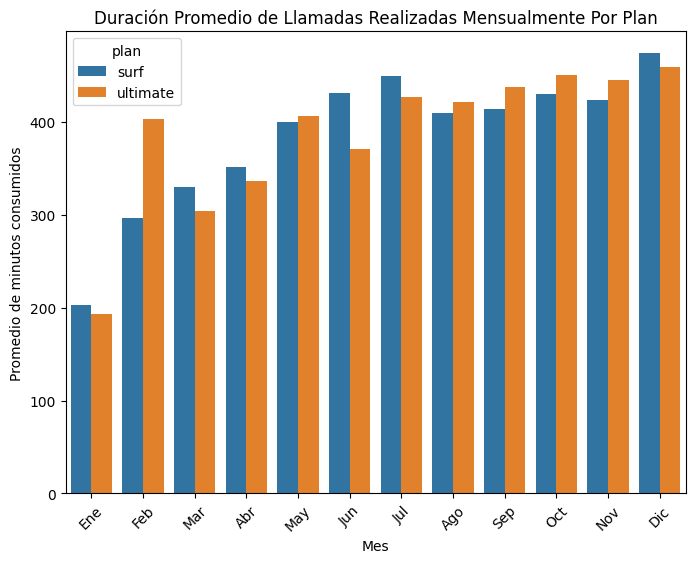

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Crear dataframe con la info necesaria para graficar
datos_llamadas = consumo_mensual[['month', 'minutes_month','plan']]

# Agrupar los datos por plan y mes arrojando el promedio mensual
promedio_llamadas_grouped = datos_llamadas.groupby(["plan", "month"])["minutes_month"].mean().reset_index()

#crear gráfico
plt.figure(figsize=(8, 6))  # Aumentar el ancho
sns.barplot(data= promedio_llamadas_grouped, x= "month", y= "minutes_month", hue= "plan", palette= colores, hue_order=orden_planes)
plt.title("Duración Promedio de Llamadas Realizadas Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de minutos consumidos")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.show()

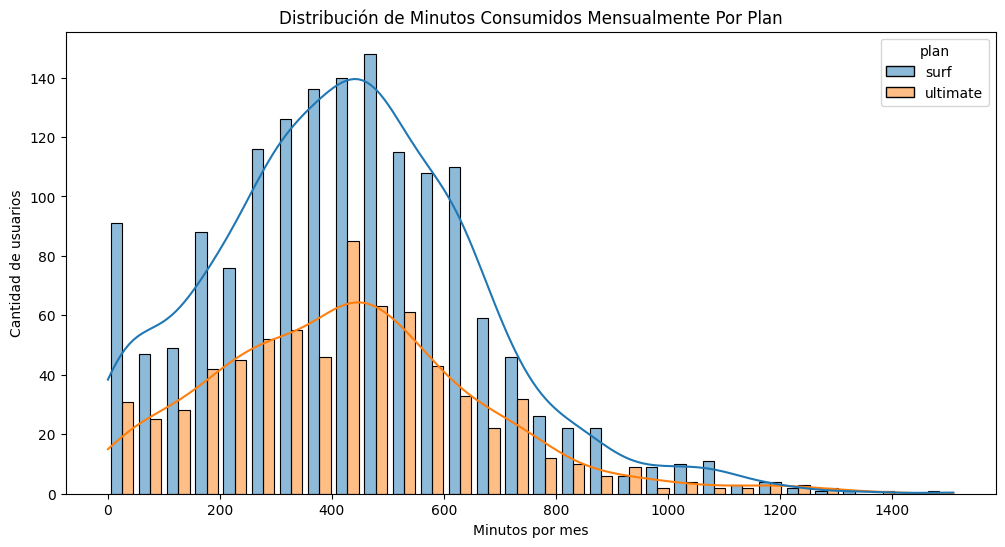

In [41]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=datos_llamadas, x='minutes_month', hue='plan', bins=30, multiple= "dodge", shrink= .8, kde= True, palette= colores, hue_order=orden_planes)
plt.title('Distribución de Minutos Consumidos Mensualmente Por Plan')
plt.xlabel('Minutos por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()

In [42]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Media y Varianza ane general
llamadas_mean = datos_llamadas["minutes_month"].mean()
print("Promedio Minutos Mensuales en General:", llamadas_mean)

llamadas_var = datos_llamadas ["minutes_month"].var()
print("Varianza de LLamadas Mensuales en General:", llamadas_var)

#Media y Varianza por plan
llamadas_grouped_mean_var = datos_llamadas.groupby(["plan"])["minutes_month"].agg(["mean", "var"])

print(""" 

Media y Varianza por Plan""")
print(llamadas_grouped_mean_var)

Promedio Minutos Mensuales en General: 429.2834714348016
Varianza de LLamadas Mensuales en General: 55847.17877118995
 

Media y Varianza por Plan
                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


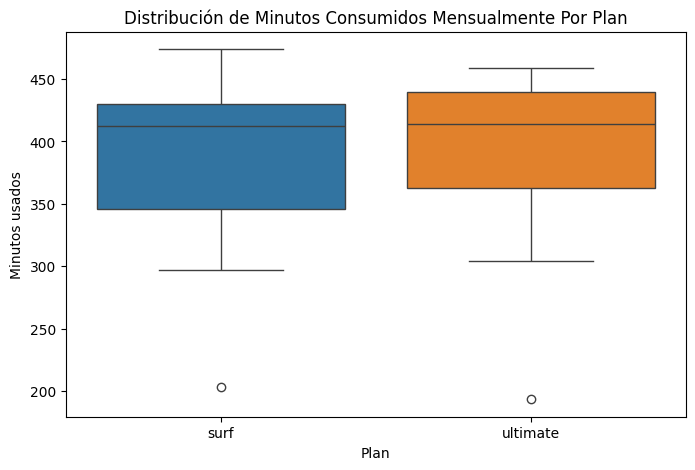

In [69]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(8, 5))
sns.boxplot(data=promedio_llamadas_grouped, x='plan', y='minutes_month', hue= "plan", palette= colores, hue_order=orden_planes)

plt.title("Distribución de Minutos Consumidos Mensualmente Por Plan")
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.show()

<div style="border-left: 10px solid #2196F3; padding: 14px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">
 
 ## **Conclusiones del analisis de llamadas**
- Los usuarios no cambian drásticamente su comportamiento de llamadas según el plan que tengan, de hecho el promedio entre cada plan no varia mucho entre ellos.
- El plan Ultimate no genera significativamente más uso de minutos
- La distribución de la duración de las llamadas se encuentra sesgada a la derecha


 ### Mensajes

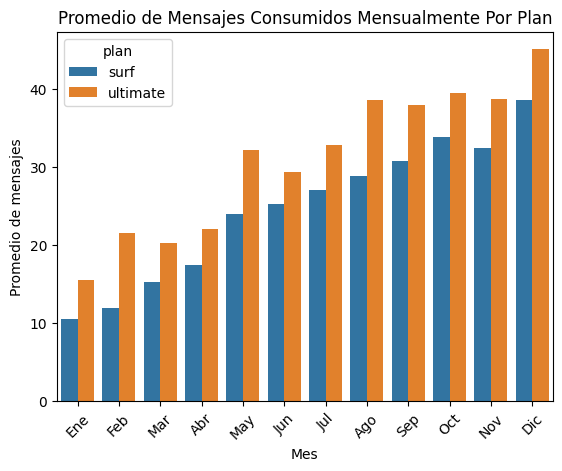

In [ ]:
# Comprara el número de mensajes promedio que tienden a enviar cada mes los usuarios de cada plan. Traza un gráfico de barras para visualizarla.

# DataFrame con los datos necesarios para el análisis de mensajes
datos_mensajes = consumo_mensual[["month", "messages_month", "plan"]]

# Agrupar los datos por mes y por plan 
promedio_datos_mensajes = datos_mensajes.groupby(["plan", "month"])["messages_month"].mean().reset_index()

# Generar gráfico de barras para la comparación entre planes
sns.barplot(data=promedio_datos_mensajes, x="month", y="messages_month", hue="plan", palette= colores, hue_order=orden_planes)
plt.title("Promedio de Mensajes Consumidos Mensualmente Por Plan")
plt.ylabel("Promedio de mensajes")
plt.xlabel("Mes")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.show()

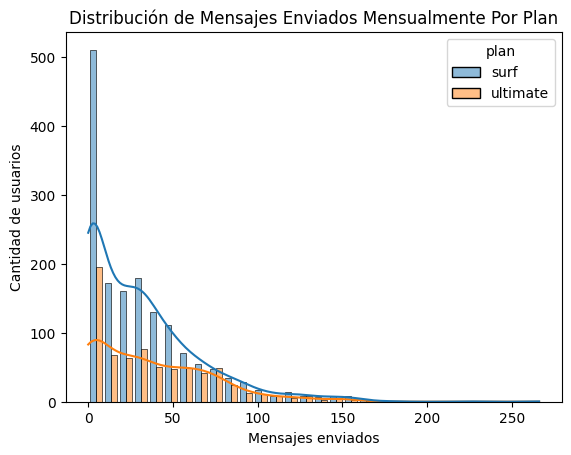

In [45]:

# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.histplot(data=datos_mensajes, x= "messages_month", hue="plan", multiple="dodge", bins=30,kde= True, shrink=.8, palette= colores, hue_order=orden_planes)
plt.title('Distribución de Mensajes Enviados Mensualmente Por Plan')
plt.xlabel('Mensajes enviados')
plt.ylabel('Cantidad de usuarios')
plt.show()

In [ ]:
# Calcula la media y la varianza de la cantidad mensajes enviados mensualmente.
mensajes_mean = datos_mensajes["messages_month"].mean()
mensajes_var = datos_mensajes["messages_month"].var()

mensajes_grouped_mean_var = datos_mensajes.groupby("plan")["messages_month"].agg(["mean", "var"])
print(f"""
Promedio de mensajes en general: {mensajes_mean}
Varianza mensajes en general: {mensajes_var}

Media y Varianza por Plan
{mensajes_grouped_mean_var}
""")


Promedio de mensajes en genral: 33.166593981683384
Varianza mensjaes en general: 1160.770663655758

Media y Varianza por Plan
               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744



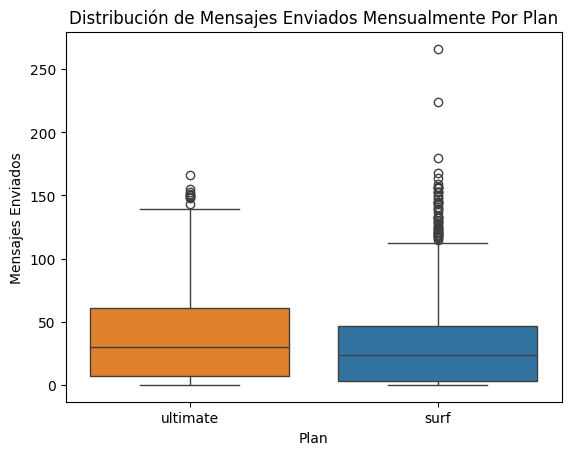

In [73]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.
sns.boxplot(data=datos_mensajes, x="plan", y="messages_month", hue= "plan", palette= colores, hue_order=orden_planes)

plt.title("Distribución de Mensajes Enviados Mensualmente Por Plan")
plt.xlabel("Plan")
plt.ylabel("Mensajes Enviados")
plt.show()

<div style="border-left: 10px solid #2196F3; padding: 14px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

 ## **Conclusiones del análisis de mensajes**  
- El promedio de mensajes enviados por los usuarios del plan ultimate es mayor que el promedio de mensajes enviados por los usuarios del plan surf
- Ambos gráficos de distribución se encuentran sesgados a la derecha
- Ambos planes envían pocos mensajes, encontrándose el 80% de los datos por debajo de 100 mensajes mensuales aproximadamente
- El plan Surf tiene más usuarios con bajo consumo de mensajes.

 ### Internet

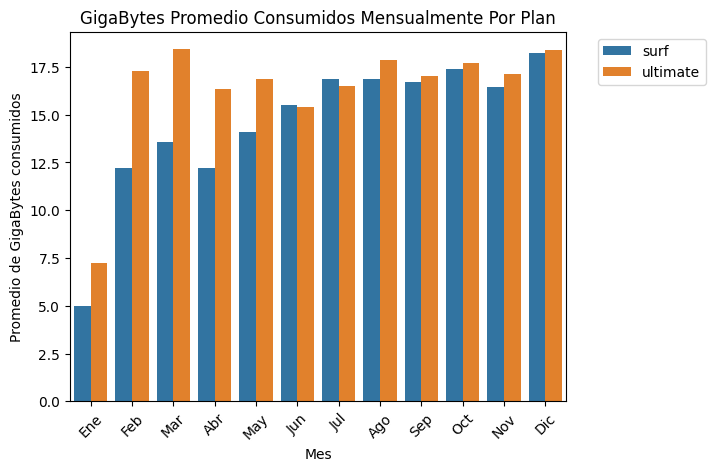

In [ ]:
# Compara la cantidad de gbs promedio que tienden a usar por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por plan y por mes
promedio_datos_gbs = consumo_mensual.groupby(["plan", "month"])["gbs_month"].mean().reset_index()

# Crear gráfico
sns.barplot(data=promedio_datos_gbs, x="month", y="gbs_month", hue="plan", palette= colores, hue_order=orden_planes)

plt.title("GigaBytes Promedio Consumidos Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de GigaBytes consumidos")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

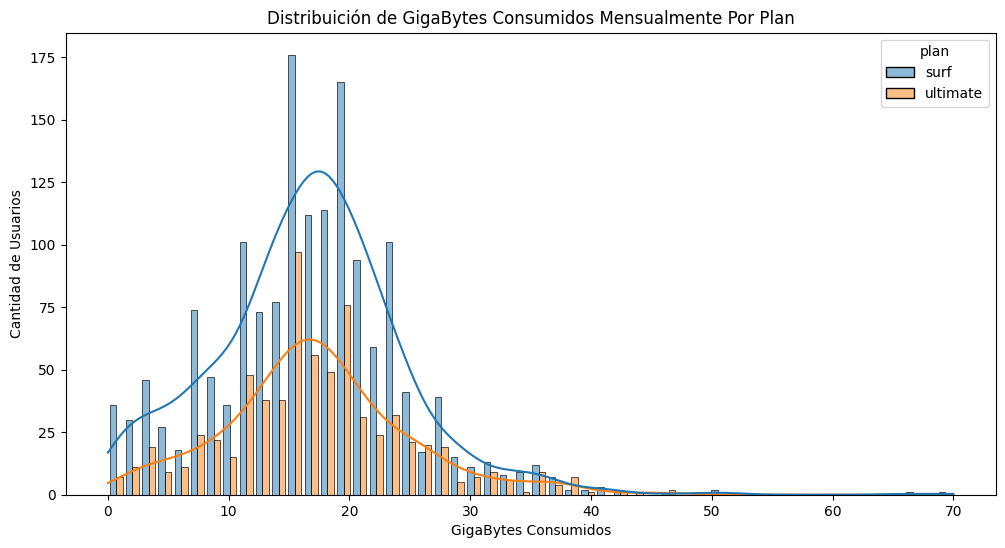

In [ ]:
# Compara el número de gbs mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Crear dataFrame con datos necesarios
datos_gbs = consumo_mensual[["plan", "month", "gbs_month"]]

# Crear histograma
plt.figure(figsize=(12,6))
sns.histplot(data= datos_gbs, x="gbs_month", hue="plan", multiple="dodge", kde= True, shrink=.8, palette= colores, hue_order=orden_planes)

plt.title("Distribución de GigaBytes Consumidos Mensualmente Por Plan")
plt.xlabel("GigaBytes Consumidos")
plt.ylabel("Cantidad de Usuarios")
plt.show()

In [50]:
# Calcula la media y la varianza de la cantidad gbs usados mensualmente.
datos_gbs_mean = datos_gbs["gbs_month"].mean()
datos_gbs_var = datos_gbs["gbs_month"].var()

datos_gbs_mean_var =  datos_gbs.groupby("plan")["gbs_month"].agg(["mean", "var"])


print(f"""
Promedio MegaBytes General: {datos_gbs_mean}
Varianza MegaBytes General: {datos_gbs_var}

Promedio y Varianza por Plan
{datos_gbs_mean_var}
""")



Promedio MegaBytes General: 16.870475359790667
Varianza MegaBytes General: 60.780336466779175

Promedio y Varianza por Plan
               mean       var
plan                         
surf      16.670693  61.58360
ultimate  17.306944  58.83055



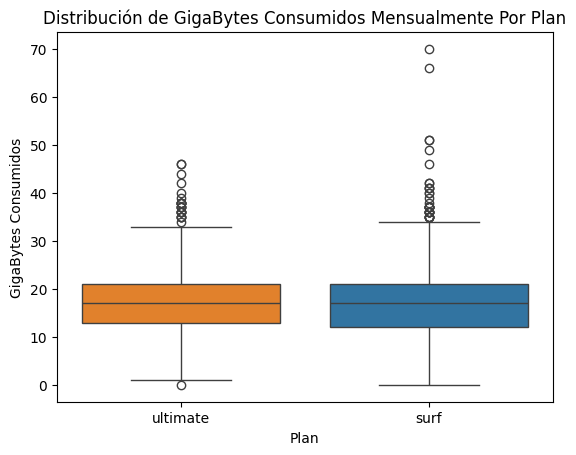

In [74]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.

sns.boxplot(data=datos_gbs, x= "plan", y="gbs_month",hue= "plan", palette= colores, hue_order=orden_planes)
plt.title("Distribución de GigaBytes Consumidos Mensualmente Por Plan")
plt.xlabel("Plan")
plt.ylabel("GigaBytes Consumidos")
plt.show()

<div style="border-left: 10px solid #2196F3; padding: 14px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

 ## **Conclusiones del análisis del consumo de MegaBytes**  
- En prácticamente todos los meses, el plan Ultimate muestra un consumo superior al plan Surf, pero esta diferencia no es muy grande a excepción de los meses de febrero, marzo, abril y mayo
- El promedio de consumo de GigaBytes del plan Surf es de 16.67 contra 17.30 GigaBytes, lo cual es una diferencia relativamente pequeña
- Plan Surf tiene un pico más alto y concentrado alrededor de 15-20 GigaBytes y el Plan Ultimate tiene Distribución más amplia y desplazada hacia consumos menores

 ## Ingreso

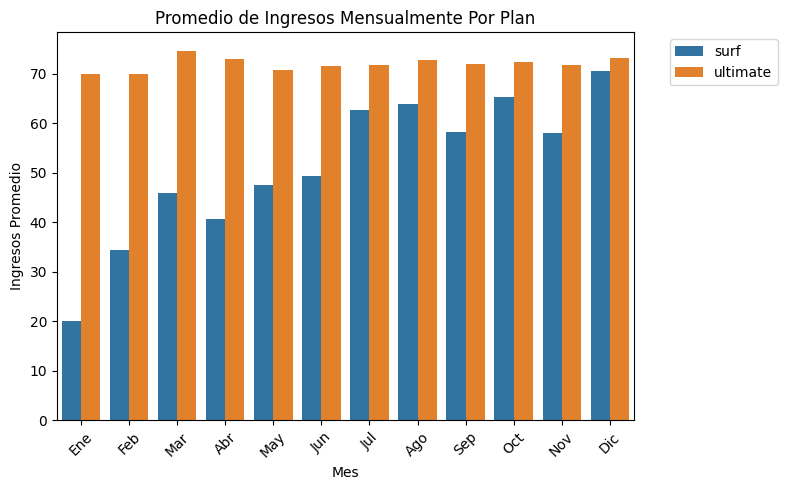

In [ ]:
# Comparación de la cantidad de gbs promedio que tienden a usar por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
promedio_datos_ingresos = consumo_mensual.groupby(["plan", "month"])["total_charge"].mean().reset_index()

# Generar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=promedio_datos_ingresos, x="month", y="total_charge", hue="plan", palette= colores, hue_order=orden_planes)
plt.title("Promedio de Ingresos Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Ingresos Promedio")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta automáticamente el espaciado
plt.show()

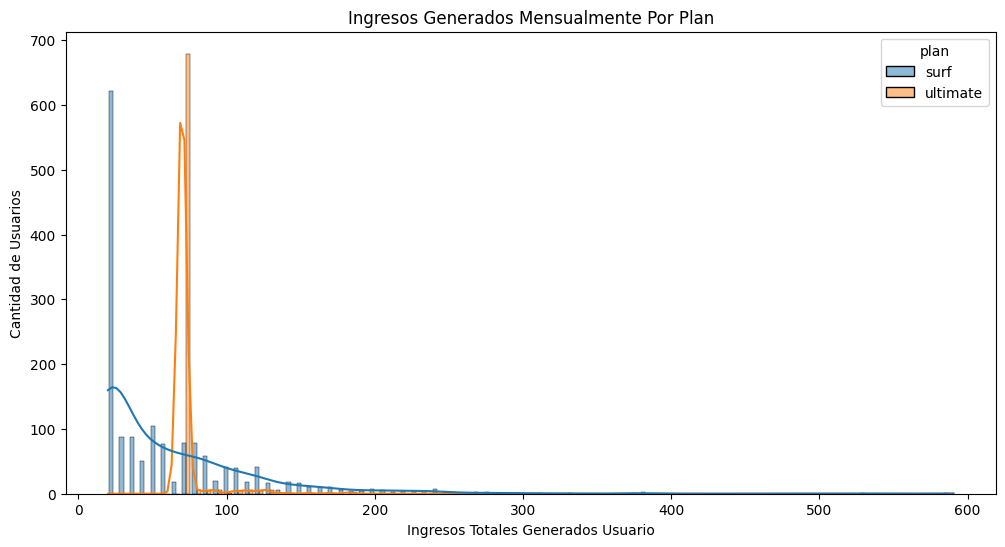

In [ ]:
# Comparación del número de gbs mensuales que necesitan los usuarios de cada plan. Traza un histograma.
datos_ingresos= consumo_mensual[["plan", "month", "total_charge"]]

plt.figure(figsize=(12,6))
sns.histplot(data=datos_ingresos, x="total_charge", hue="plan", multiple="dodge", shrink=.8, kde=True, palette= colores, hue_order=orden_planes)
plt.title("Ingresos Generados Mensualmente Por Plan")
plt.xlabel("Ingresos Totales Generados Usuario")
plt.ylabel("Cantidad de Usuarios")
plt.show()

In [ ]:
# Calcula la media y la varianza de la cantidad gbs usados mensualmente.
datos_ingresos_mean = datos_ingresos["total_charge"].mean()
datos_ingresos_var = datos_ingresos["total_charge"].var()
datos_ingresos_mean_var = datos_ingresos.groupby("plan")["total_charge"].agg(["mean", "var"])

# Mediana plan surf
datos_plan_surf = datos_ingresos.query("plan == 'surf'")["total_charge"]
mediana = datos_plan_surf.median()

print(f"""
Promedio Ingresos General: {datos_ingresos_mean}
Varianza Ingresos General: {datos_ingresos_var}

Promedio y Varianza por Plan
{datos_ingresos_mean_var}

Mediana plan surf: {mediana}

Describe Plan Surf: 
{datos_plan_surf.describe()}
""")


Promedio Ingresos General: 64.3511469690362
Varianza Ingresos General: 2173.8855276978493

Promedio y Varianza por Plan
               mean          var
plan                            
surf      60.706408  3067.835152
ultimate  72.313889   129.848486

Mediana plan surf: 40.36

Describe Plan Surf: 
count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_charge, dtype: float64



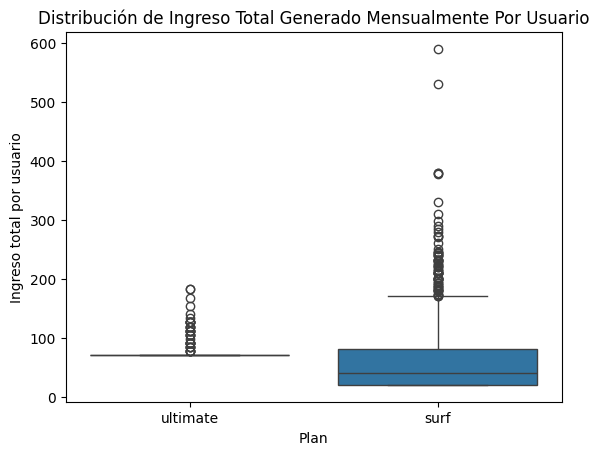

In [55]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.
sns.boxplot(data=datos_ingresos, x="plan", y="total_charge", hue="plan", palette= colores, hue_order=orden_planes)

plt.title('Distribución de Ingreso Total Generado Mensualmente Por Usuario')
plt.ylabel('Ingreso total por usuario')
plt.xlabel('Plan')
plt.show()

<div style="border-left: 10px solid #2196F3; padding: 14px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

 ## Conclusiones Sobre los Ingresos Generados por Cada Plan
- EL promedio de ingresos del plan surf estan en todos los meses por debajo del plan ultimate
- Los ingresos promedio mensuales son muy constantes para el plan Ultimate, y muy variantes para el plan surf.
- El 75% de los usuarios no pasan de pagar 80.36 Dolares, y el 50% no pasan de pagar 40.36 Dolares lo que indica que aunque el Plan Surf genera más ingresos se debe a su alto volumen de demanda

 ## Prueba de hipótesis estadísticas


**Hipotesis Nula (H₀):**  
- Los ingresos promedio del plan surf son iguales a los ingresos promedio del plan ultimate.  

**Hipótesis Alternativa (H₁):**  
- Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf


In [56]:
# Prueba las hipótesis

# Filtrar los datos
ingresos_surf = datos_ingresos[datos_ingresos["plan"]== "surf"]["total_charge"]
ingresos_ultimate = datos_ingresos[datos_ingresos["plan"]== "ultimate"]["total_charge"]

In [57]:
# Prueba de levene
stat_levene, p_value_levene = st.levene(ingresos_surf, ingresos_ultimate)

print(f"Levene varianzas entre surf y ultimate")
print(f"Valor p: {p_value_levene:.4f}")

# Interpretar resultado
alpha = 0.05
if p_value_levene > alpha:
    print("Las varianzas son homogéneas (equal_var=True)")
    equal_var = True
else:
    print("Las varianzas NO son homogéneas (equal_var=False)")
    equal_var = False


Levene varianzas entre surf y ultimate
Valor p: 0.0000
Las varianzas NO son homogéneas (equal_var=False)


In [58]:
# Nivel de significancia (si el resultado de p es mayor al 05% significa que la diferencia podria ser por casualidad y si es menor no es casualidad)
alpha= .05

# Realizar la prueba t de las 2 muestras
results1 = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var = False)

print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 3.170390548113574e-15
Rechazamos la hipótesis nula


**Hipotesis Nula (H₀):**  
- Los ingresos promedio generados por los usuarios del área de NY.NJ son iguales a los ingresos promedio generados por otras regiones.

**Hipótesis Alternativa (H₁):**  
- Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones.

In [59]:
# Prueba las hipótesis

# Agregar información de ciudad al DataFrame consumo_mensual
consumo_mensual = consumo_mensual.merge(users[["user_id", "city"]], on="user_id", how="left")

In [60]:
# Filtrar datos para comparar
users_ny_nj = consumo_mensual[consumo_mensual["city"].str.contains('NY-NJ', case=False, na=False)]["total_charge"]
users_not_ny_nj = consumo_mensual[~consumo_mensual["city"].str.contains('NY-NJ',case=False, na=False)]["total_charge"]

In [61]:
# Prueba de levene
stat_levene, p_value_levene = st.levene(users_ny_nj, users_not_ny_nj)

print(f"Levene varianzas entre NY-NJ y Otras Regiones")
print(f"Valor p: {p_value_levene:.4f}")

# Interpretar resultado
alpha = 0.05
if p_value_levene > alpha:
    print("Las varianzas son homogéneas (equal_var=True)")
    equal_var = True
else:
    print("Las varianzas NO son homogéneas (equal_var=False)")
    equal_var = False


Levene varianzas entre NY-NJ y Otras Regiones
Valor p: 0.1258
Las varianzas son homogéneas (equal_var=True)


In [ ]:
# Nivel de significancia (Nivel de error aceptado menor al 05%)
alpha = .05

#prueba de hipótesis
results2 = st.ttest_ind(users_ny_nj, users_not_ny_nj, equal_var=True)

print('Valor p:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencia significativa entre regiones")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa")

Valor p: 0.043557431621342436
Rechazamos la hipótesis nula: Hay diferencia significativa entre regiones


<div style="border-left: 10px solid #4CAF50; padding: 12px; background: #F5F5F5;border-radius: 8px; background: #D6D6D6; color: #000000;">

## CONCLUSIONES GENERALES DEL PROYECTO

El presente análisis permitió evaluar el comportamiento de consumo, ingresos y rentabilidad de los usuarios de la empresa Megaline, integrando datos de llamadas, mensajes e internet a nivel mensual por usuario.

### Principales Hallazgos  

**1. Comportamiento de Ingresos por Plan:**  
Plan Ultimate: Genera ingresos más estables y predecibles aproximadamente 72 Dolares mensuales.  
Plan Surf: Presenta mayor variabilidad, con ingresos que oscilan entre \$ 20-600 con el 75% de los usuarios por debajo de \$ 80.36 Dolares.  
Los usuarios de Surf tienden a exceder más frecuentemente los límites incluidos.  

- Esto indica que el plan Ultimate ofrece una base de ingresos más consistente, mientras que el plan Surf depende en mayor medida del consumo adicional de los usuarios.

**2. Patrones de Consumo:**  
Usuarios Ultimate: Raramente superan los límites incluidos (3000 min, 1000 SMS, 30GB).  
Usuarios Surf: Frecuentemente exceden los límites básicos (500 min, 50 SMS, 15GB), generando cargos adicionales.  

- Este comportamiento sugiere que los usuarios del plan Surf presentan un perfil de consumo menos predecible y mayor sensibilidad a los límites del plan.

**3. Distribución de Ingresos:**  
Ultimate: Distribución concentrada y uniforme alrededor del precio base.  
Surf: Distribución sesgada a la derecha con cola larga, indicando usuarios de alto consumo.  

- La presencia de una cola larga en el plan Surf explica la alta variabilidad de ingresos y la existencia de usuarios que generan ingresos significativamente superiores al promedio.

<br>
<br>

### **Resultados de las Pruebas de Hipótesis**

Las pruebas estadísticas permitieron validar cuantitativamente las diferencias observadas en el análisis exploratorio.

### **Hipótesis 1**

**Hipótesis Nula (H₀):**  
Los ingresos promedio del plan Surf son iguales a los ingresos promedio del plan Ultimate.  

**Hipótesis Alternativa (H₁):**  
Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf.  

**Resultado**  
_Rechazamos la hipótesis nula y aceptamos la hipótesis alternativa "Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf"._

- Este resultado confirma que las diferencias observadas entre ambos planes no se deben al azar, sino a un comportamiento estructural distinto de los usuarios.

<br>

### **Hipótesis 2**

**Hipótesis Nula (H₀):**  
Los ingresos promedio generados por los usuarios del área de NY.NJ son iguales a los ingresos promedio generados por otras regiones.  

**Hipótesis Alternativa (H₁):**  
Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones.  

**Resultado**  
_Rechazamos la hipótesis nula y aceptamos la hipótesis alternativa "Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones."_  

- Esto sugiere que la ubicación geográfica influye en el comportamiento de consumo y generación de ingresos.
<br>
<br>

## Conclusión Final

En respuesta a la pregunta planteada... _"El departamento comercial quiere saber ¿cuál de las tarifas genera más ingresos?, para poder ajustar el presupuesto de publicidad."_

- El plan Surf genera mayores ingresos totales (Surf \$95,491 vs Ultimate \$52,066), pero el plan Ultimate es más rentable por usuario (Ultimate \$72.31 vs Surf \$60.70).  
- Recomiendo enfocar el presupuesto publicitario según el objetivo estratégico: Surf para volumen total, Ultimate para rentabilidad.

**En conjunto, estos resultados sugieren la coexistencia de dos estrategias complementarias: captar volumen mediante el plan Surf y maximizar la rentabilidad y estabilidad mediante el plan Ultimate.**
<br>
<br>

---

## Insights Principales

### 1. El plan Surf genera mayores ingresos totales, mientras que el plan Ultimate es más rentable por usuario
El análisis de ingresos muestra que el plan Surf acumula un mayor volumen total de ingresos, mientras que el plan Ultimate presenta un ingreso promedio mensual más alto y estable por cliente.  
**Recomendación:** Asignar el presupuesto publicitario de forma diferenciada: promover Surf para impulsar el volumen total de ingresos y Ultimate para maximizar la rentabilidad por usuario.

---

### 2. La variabilidad de ingresos del plan Surf está impulsada por el consumo excedente
Los ingresos del plan Surf muestran una alta dispersión debido a que los usuarios exceden con frecuencia los límites incluidos, generando cargos adicionales y una distribución sesgada a la derecha.  
**Recomendación:** Implementar estrategias de *upselling* hacia el plan Ultimate o revisar los límites del plan Surf para reducir la volatilidad y mejorar la experiencia del usuario.

---

### 3. El plan Ultimate ofrece ingresos más estables y predecibles
Los usuarios del plan Ultimate rara vez superan los límites incluidos, lo que genera una distribución de ingresos concentrada alrededor del precio base y facilita la planeación financiera.  
**Recomendación:** Posicionar el plan Ultimate como una opción premium orientada a usuarios de alto consumo y mayor valor a largo plazo.

---

### 4. Existen perfiles de cliente claramente diferenciados según el plan contratado
Los patrones de consumo indican que el plan Surf atrae a usuarios con consumo variable y sensibilidad a los límites, mientras que el plan Ultimate concentra clientes con consumo alto y comportamiento más estable.  
**Recomendación:** Segmentar las campañas de adquisición y retención según el perfil del cliente, evitando tratar ambos planes como productos sustitutos directos.

---

### 5. La ubicación geográfica influye en la generación de ingresos
Las pruebas de hipótesis muestran que los ingresos promedio de los usuarios del área NY–NJ son significativamente distintos a los de otras regiones, lo que indica patrones de consumo diferenciados por ubicación.  
**Recomendación:** Diseñar estrategias comerciales y campañas publicitarias adaptadas por región para maximizar la eficiencia del presupuesto.

---

**En conjunto, estos insights muestran que una estrategia óptima para Megaline no consiste en priorizar una sola tarifa, sino en combinar crecimiento en volumen mediante el plan Surf con estabilidad y rentabilidad a través del plan Ultimate, alineando la oferta con los distintos perfiles de cliente y contextos regionales.**
